# REGRESIÓN DE UNA FUNCIÓN CON THEANO

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
import theano
import theano.tensor as T

In [3]:
trX = np.linspace(-1,1,101)
trY = np.linspace(-1,1,101)
for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

In [4]:
X = T.scalar()
Y = T.scalar()

def model(X, w0, w1):
    return log(1 + w0 * abs(X)) + w1 * X

w0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype = theano.config.floatX))

y = model(X, w0, w1)

cost     = T.mean(T.sqr(y - Y))
gradient_w0 = T.grad(cost = cost, wrt = w0)
gradient_w1 = T.grad(cost = cost, wrt = w1)

updates  = [[w0, w0- gradient_w0 * 0.01], [w1, w1 - gradient_w1 * 0.01]]

train = theano.function(inputs = [X, Y], outputs = cost, updates = updates, allow_input_downcast = True)

for i in range(50):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
    print 'En el paso', i, 'el valor de w0 es', w0.get_value(),'y el valor de w1 es', w1.get_value(),\
    'con un coste', cost_i  

En el paso 0 el valor de w0 es 0.200678646872 y el valor de w1 es 0.168433140329 con un coste 0.154052220886
En el paso 1 el valor de w0 es 0.30674454958 y el valor de w1 es 0.254337893808 con un coste 0.0464142811225
En el paso 2 el valor de w0 es 0.371281148956 y el valor de w1 es 0.296456107128 con un coste 0.0148873819435
En el paso 3 el valor de w0 es 0.412895083889 y el valor de w1 es 0.316605474341 con un coste 0.00494783215335
En el paso 4 el valor de w0 es 0.440517608066 y el valor de w1 es 0.325972724624 con un coste 0.00165700578579
En el paso 5 el valor de w0 es 0.459148204746 y el valor de w1 es 0.330145116934 con un coste 0.000536277472476
En el paso 6 el valor de w0 es 0.471832067763 y el valor de w1 es 0.331870849377 con un coste 0.000155260463161
En el paso 7 el valor de w0 es 0.480516668659 y el valor de w1 es 0.332482079981 con un coste 3.32894927171e-05
En el paso 8 el valor de w0 es 0.486484210872 y el valor de w1 es 0.33261282365 con un coste 2.2249828738e-06
En e

# RED NEURONAL CON THEANO

In [4]:
from theano.ifelse import ifelse

# Definición de las variables simbólicas
x = T.vector('x')
w = T.vector('w')
b = T.scalar('b')

# Definición de la neurona
z = T.dot(x, w) + b
a = ifelse(T.mod(z, 2), 0, 1)

# Creación de la función
neuron = theano.function([x, w, b], a)

In [5]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
weights = [1, 1, 1]
bias = 1

# Iteramos sobre todas las entradas
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t, weights, bias)
    print 'El resultado para [%d, %d, %d] es %d' % (t[0], t[1], t[2], out)

El resultado para [0, 0, 0] es 0
El resultado para [0, 0, 1] es 1
El resultado para [0, 1, 0] es 1
El resultado para [0, 1, 1] es 0
El resultado para [1, 0, 0] es 1
El resultado para [1, 0, 1] es 0
El resultado para [1, 1, 0] es 0
El resultado para [1, 1, 1] es 1


In [6]:
# Definición de las variables simbólicas
w = theano.shared(np.array([1, 1, 1]))
b = theano.shared(1.)

# Definición de la neurona
z = T.dot(x, w) + b
a = ifelse(T.mod(z, 2), 0, 1)

# Creación de la función
neuron = theano.function([x], a)

# Iteramos sobre todas las entradas
for i in range(len(inputs)):
    t = inputs[i]
    out = neuron(t)
    print 'El resultado para [%d, %d, %d] es %d' % (t[0], t[1], t[2], out)

El resultado para [0, 0, 0] es 0
El resultado para [0, 0, 1] es 1
El resultado para [0, 1, 0] es 1
El resultado para [0, 1, 1] es 0
El resultado para [1, 0, 0] es 1
El resultado para [1, 0, 1] es 0
El resultado para [1, 1, 0] es 0
El resultado para [1, 1, 1] es 1


In [7]:
# Definición de las variables simbólicas
x = T.matrix('x')
w = theano.shared(np.array([1, 1, 1], dtype = theano.config.floatX))
b = theano.shared(1.0)
learning_rate = 0.01

# Definición de la neurona
z = T.dot(x, w) + b
a = 1 / (1 + T.exp(-z))

In [8]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a) + (1 - a_hat) * T.log(1 - a)).sum()

In [9]:
dw, db = T.grad(cost, [w, b])

train = theano.function(
    inputs = [x, a_hat],
    outputs = [a, cost],
    updates = [[w, w - learning_rate * dw], [b, b - learning_rate * db]])

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.50
El resultado para [0, 0, 1] es 0.50
El resultado para [0, 1, 0] es 0.50
El resultado para [0, 1, 1] es 0.50
El resultado para [1, 0, 0] es 0.50
El resultado para [1, 0, 1] es 0.50
El resultado para [1, 1, 0] es 0.50
El resultado para [1, 1, 1] es 0.50

El vector w es [0.00, 0.00, 0.00]
El valor del bias es -0.00


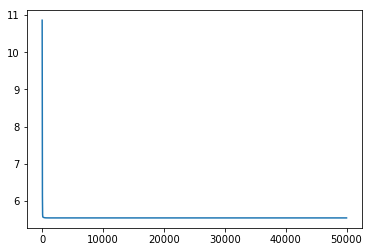

In [10]:
# Conjunto de datos de entrenamiento
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(50000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])
    
# Resultados
print
print 'El vector w es [%.2f, %.2f, %.2f]' % (w.get_value()[0], w.get_value()[0], w.get_value()[0])
print 'El valor del bias es %.2f' % b.get_value()

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

In [11]:
x = T.matrix('x')
w1 = theano.shared(np.array([.34, .21, .52], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.60, .46, .79], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.85, .18, .51], dtype = theano.config.floatX))
w4 = theano.shared(np.array([.99, .95, .91], dtype = theano.config.floatX))
learning_rate = 0.05

In [12]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1)))
a2 = 1 / (1 + T.exp(-T.dot(x, w2)))
a3 = 1 / (1 + T.exp(-T.dot(x, w3)))
x2 = T.stack([a1, a2, a3], axis = 1)
a4 = 1 / (1 + T.exp(-T.dot(x2, w4)))

In [13]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a4) + (1 - a_hat) * T.log(1 - a4)).sum()
dw1, dw2, dw3, dw4 = T.grad(cost, [w1, w2, w3, w4])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a4,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
    ]
)

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.01
El resultado para [0, 0, 1] es 0.99
El resultado para [0, 1, 0] es 1.00
El resultado para [0, 1, 1] es 0.00
El resultado para [1, 0, 0] es 1.00
El resultado para [1, 0, 1] es 0.00
El resultado para [1, 1, 0] es 0.00
El resultado para [1, 1, 1] es 1.00

El vector w1 es [-12.05, -12.05]
El vector w2 es [-0.84, -0.84]
El vector w3 es [6.90, 6.90]
El vector w4 es [21.13, 21.13]


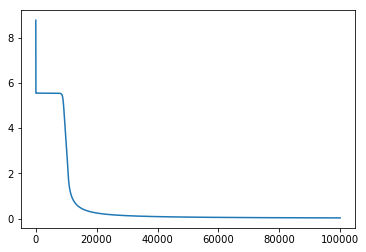

In [14]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(100000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])

    # Resultados
print
print 'El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0])
print 'El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0])
print 'El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0])
print 'El vector w4 es [%.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[0])
# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

In [15]:
x = T.matrix('x')
w1 = theano.shared(np.array([.12, .21, .34], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.35, .27, .65], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.22, .81, .48], dtype = theano.config.floatX))
w4 = theano.shared(np.array([.99, .87, .91], dtype = theano.config.floatX))
b2 = theano.shared(1.)
learning_rate = 0.05

In [16]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1)))
a2 = 1 / (1 + T.exp(-T.dot(x, w2)))
a3 = 1 / (1 + T.exp(-T.dot(x, w3)))
x2 = T.stack([a1, a2, a3], axis = 1)
a4 = 1 / (1 + T.exp(-T.dot(x2, w4) - b2))

In [17]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a4) + (1 - a_hat) * T.log(1 - a4)).sum()
dw1, dw2, dw3, dw4, db2 = T.grad(cost, [w1, w2, w3, w4, b2])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a4,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
        [b2, b2 - learning_rate * db2]
    ]
)

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.01
El resultado para [0, 0, 1] es 1.00
El resultado para [0, 1, 0] es 1.00
El resultado para [0, 1, 1] es 0.00
El resultado para [1, 0, 0] es 1.00
El resultado para [1, 0, 1] es 0.00
El resultado para [1, 1, 0] es 0.00
El resultado para [1, 1, 1] es 1.00

El vector w1 es [-8.62, -8.62]
El vector w2 es [-6.01, -6.01]
El vector w3 es [-6.01, -6.01]
El vector w4 es [23.29, 23.29]
El valor del bias 2 es 6.31


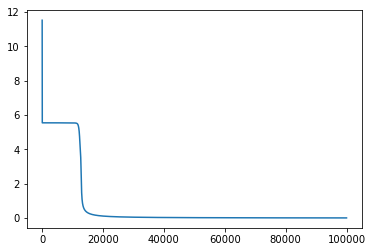

In [18]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(100000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])

    # Resultados
print
print 'El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0])
print 'El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0])
print 'El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0])
print 'El vector w4 es [%.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[0])
print 'El valor del bias 2 es %.2f' % b2.get_value()
# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

In [33]:
x = T.matrix('x')
w1 = theano.shared(np.array([.12, .21, .34], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.35, .27, .65], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.22, .81, .48], dtype = theano.config.floatX))
w4 = theano.shared(np.array([.99, .87, .91], dtype = theano.config.floatX))
b1 = theano.shared(.5)
learning_rate = 0.05

In [34]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
a3 = 1 / (1 + T.exp(-T.dot(x, w3) - b1))
x2 = T.stack([a1, a2, a3], axis = 1)
a4 = 1 / (1 + T.exp(-T.dot(x2, w4)))

In [35]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a4) + (1 - a_hat) * T.log(1 - a4)).sum()
dw1, dw2, dw3, dw4, db1 = T.grad(cost, [w1, w2, w3, w4, b1])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a4,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
        [b1, b1 - learning_rate * db1]
    ]
)

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.50
El resultado para [0, 0, 1] es 1.00
El resultado para [0, 1, 0] es 1.00
El resultado para [0, 1, 1] es 0.00
El resultado para [1, 0, 0] es 1.00
El resultado para [1, 0, 1] es 0.00
El resultado para [1, 1, 0] es 0.00
El resultado para [1, 1, 1] es 1.00

El vector w1 es [-6.54, -6.54]
El vector w2 es [9.45, 9.45]
El vector w3 es [5.92, 5.92]
El vector w4 es [13.76, 13.76]
El valor del bias 1 es -8.94


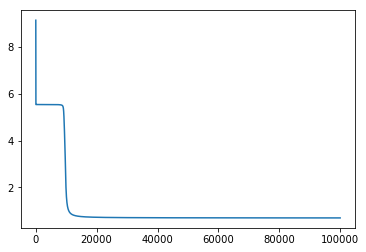

In [36]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(100000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])

    # Resultados
print
print 'El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0])
print 'El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0])
print 'El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0])
print 'El vector w4 es [%.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[0])
print 'El valor del bias 1 es %.2f' % b1.get_value()

# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)

In [59]:
x = T.matrix('x')
w1 = theano.shared(np.array([.12, .21, .34], dtype = theano.config.floatX))
w2 = theano.shared(np.array([.35, .27, .65], dtype = theano.config.floatX))
w3 = theano.shared(np.array([.22, .81, .48], dtype = theano.config.floatX))
w4 = theano.shared(np.array([.99, .87, .91], dtype = theano.config.floatX))
b1 = theano.shared(.5)
b2 = theano.shared(1.)
learning_rate = 0.02

In [60]:
a1 = 1 / (1 + T.exp(-T.dot(x, w1) - b1))
a2 = 1 / (1 + T.exp(-T.dot(x, w2) - b1))
a3 = 1 / (1 + T.exp(-T.dot(x, w3) - b1))
x2 = T.stack([a1, a2, a3], axis = 1)
a4 = 1 / (1 + T.exp(-T.dot(x2, w4) - b2))

In [61]:
a_hat = T.vector('a_hat')
cost = -(a_hat * T.log(a4) + (1 - a_hat) * T.log(1 - a4)).sum()
dw1, dw2, dw3, dw4, db1, db2 = T.grad(cost, [w1, w2, w3, w4, b1, b2])

train = theano.function(
    inputs = [x,a_hat],
    outputs = [a4,cost],
    updates = [
        [w1, w1 - learning_rate * dw1],
        [w2, w2 - learning_rate * dw2],
        [w3, w3 - learning_rate * dw3],
        [w4, w4 - learning_rate * dw4],
        [b1, b1 - learning_rate * db1],
        [b2, b2 - learning_rate * db2]
    ]
)

Los resultados de la red son:
El resultado para [0, 0, 0] es 0.02
El resultado para [0, 0, 1] es 0.99
El resultado para [0, 1, 0] es 0.99
El resultado para [0, 1, 1] es 0.01
El resultado para [1, 0, 0] es 0.99
El resultado para [1, 0, 1] es 0.00
El resultado para [1, 1, 0] es 0.00
El resultado para [1, 1, 1] es 1.00

El vector w1 es [-14.28, -14.28]
El vector w2 es [-8.01, -8.01]
El vector w3 es [-5.11, -5.11]
El vector w4 es [37.24, 37.24]
El valor del bias 1 es -0.89
El valor del bias 2 es 4.44


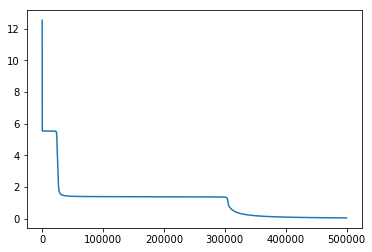

In [62]:
inputs = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
outputs = [0, 1, 1, 0, 1, 0, 0, 1]

# Iteramos sobre el conjunto de entrenamiento 
cost = []
for iteration in range(500000):
    pred, cost_iter = train(inputs, outputs)
    cost.append(cost_iter)
    
# Se imprimen los resultados por pantalla
print 'Los resultados de la red son:'
for i in range(len(inputs)):
    print 'El resultado para [%d, %d, %d] es %.2f' % (inputs[i][0], inputs[i][1], inputs[i][2], pred[i])

    # Resultados
print
print 'El vector w1 es [%.2f, %.2f]' % (w1.get_value()[0], w1.get_value()[0])
print 'El vector w2 es [%.2f, %.2f]' % (w2.get_value()[0], w2.get_value()[0])
print 'El vector w3 es [%.2f, %.2f]' % (w3.get_value()[0], w3.get_value()[0])
print 'El vector w4 es [%.2f, %.2f]' % (w4.get_value()[0], w4.get_value()[0])
print 'El valor del bias 1 es %.2f' % b1.get_value()
print 'El valor del bias 2 es %.2f' % b2.get_value()
# Función de esfuerzo en función del número de iteraciones
plt.plot(cost)